In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')

/tmp/ipykernel_4385/1856311698.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/work/Daily_Cuaca_Kebumen.csv')


In [3]:
data2 = pd.read_csv('/work/Kebumen 2023-01-01 to 2024-12-31.csv')

In [4]:
data1.tail(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
16380,"Kebumen, Indonesia",2022-12-22,32.1,25.1,26.9,39.3,25.1,28.6,23.4,82.0,...,13.5,5.0,30.0,1671686556,1671731809,0.96,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16381,"Kebumen, Indonesia",2022-12-23,31.6,23.7,25.9,38.4,23.7,26.9,22.9,83.9,...,10.0,7.0,10.0,1671772986,1671818239,0.00,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16382,"Kebumen, Indonesia",2022-12-24,28.9,24.1,26.0,33.5,24.1,27.0,22.6,81.9,...,10.0,6.0,10.0,1671859417,1671904668,0.03,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"96805099999,remote"
16383,"Kebumen, Indonesia",2022-12-25,28.7,24.5,25.9,33.8,24.5,26.8,22.8,83.6,...,7.3,5.0,10.0,1671945847,1671991097,0.06,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16384,"Kebumen, Indonesia",2022-12-26,30.2,23.4,26.0,35.9,23.4,27.0,22.9,83.3,...,23.3,9.0,30.0,1672032278,1672077525,0.10,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"96805099999,remote"
16385,"Kebumen, Indonesia",2022-12-27,30.1,23.8,26.2,35.2,23.8,27.5,22.9,82.3,...,20.2,8.0,10.0,1672118709,1672163953,0.13,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"96805099999,remote"
16386,"Kebumen, Indonesia",2022-12-28,29.6,24.0,26.6,35.9,24.0,27.9,23.2,82.0,...,25.6,10.0,30.0,1672205140,1672250380,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"96805099999,remote"
16387,"Kebumen, Indonesia",2022-12-29,32.1,24.2,26.5,38.4,24.2,27.8,23.1,82.1,...,16.4,9.0,30.0,1672291571,1672336807,0.20,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"96805099999,remote"
16388,"Kebumen, Indonesia",2022-12-30,30.9,23.9,26.8,35.6,23.9,28.4,22.6,78.4,...,20.2,10.0,30.0,1672378003,1672423234,0.25,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
16389,"Kebumen, Indonesia",2022-12-31,31.1,24.1,26.8,36.2,24.1,28.2,22.8,79.2,...,20.6,9.0,30.0,1672464434,1672509660,0.27,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"96805099999,remote"


In [5]:
data2.tail(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
721,Kebumen,2024-12-22,32.7,25.9,28.0,41.1,25.9,30.6,24.8,83.5,...,18.4,8,30,2024-12-22T05:22:53,2024-12-22T17:57:05,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,96805099999
722,Kebumen,2024-12-23,32.7,25.1,27.8,40.3,25.1,30.8,24.7,84.1,...,18.6,9,30,2024-12-23T05:23:23,2024-12-23T17:57:35,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,96805099999
723,Kebumen,2024-12-24,31.1,25.1,26.8,38.0,25.1,28.7,24.7,88.9,...,7.7,4,30,2024-12-24T05:23:53,2024-12-24T17:58:04,0.78,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,96805099999
724,Kebumen,2024-12-25,32.4,25.1,27.7,39.9,25.1,30.5,24.7,84.6,...,14.5,8,10,2024-12-25T05:24:24,2024-12-25T17:58:32,0.82,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,96805099999
725,Kebumen,2024-12-26,29.4,25.1,26.8,35.3,25.1,28.8,24.4,86.9,...,12.7,7,30,2024-12-26T05:24:55,2024-12-26T17:59:00,0.85,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,96805099999
726,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6,10,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
727,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6,30,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
728,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2,10,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
729,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10,10,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote
730,Kebumen,2024-12-31,28.4,24.0,26.1,31.7,24.0,27.0,23.0,83.5,...,10.9,6,10,2024-12-31T05:27:31,2024-12-31T18:01:14,0.00,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,remote


In [6]:
data3 = pd.concat([data1, data2], ignore_index=True)

data3

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kebumen, Indonesia",1978-02-16,32.1,25.1,28.1,39.3,25.1,31.4,24.8,83.5,...,NaN,NaN,NaN,1978-02-16T05:45:06,1978-02-16T18:05:40,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
1,"Kebumen, Indonesia",1978-02-17,31.1,25.1,27.9,37.9,25.1,31.8,24.9,84.4,...,NaN,NaN,NaN,1978-02-17T05:45:14,1978-02-17T18:05:24,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
2,"Kebumen, Indonesia",1978-02-18,32.1,26.1,29.0,40.8,26.1,33.6,25.5,82.7,...,NaN,NaN,NaN,1978-02-18T05:45:22,1978-02-18T18:05:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
3,"Kebumen, Indonesia",1978-02-19,33.1,25.1,28.5,39.4,25.1,32.2,25.1,83.2,...,NaN,NaN,NaN,1978-02-19T05:45:29,1978-02-19T18:04:50,0.38,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
4,"Kebumen, Indonesia",1978-02-20,31.1,24.1,27.1,44.4,24.1,30.7,23.1,85.2,...,NaN,NaN,NaN,1978-02-20T05:45:35,1978-02-20T18:04:32,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17116,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6.0,10.0,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
17117,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6.0,30.0,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
17118,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2.0,10.0,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
17119,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10.0,10.0,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote


In [7]:
data3.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,...,17121.000000,16407.000000,13093.000000,16700.000000,16695.000000,5479.000000,5479.000000,5479.000000,1087.000000,17121.000000
mean,29.977749,24.762790,27.084455,35.016114,24.911084,29.429234,23.694479,82.315126,8.965808,58.053892,...,16.651434,159.296587,1011.163080,72.508671,10.647553,216.319566,18.674119,7.532031,19.770009,0.483781
std,1.716596,1.344498,1.219990,3.475373,1.842660,2.545827,1.098086,4.442787,21.330792,49.348563,...,8.037371,63.588276,1.869502,16.539230,2.547669,59.172609,5.113399,1.896949,11.830311,0.288673
min,21.900000,2.600000,20.400000,21.900000,-0.900000,19.800000,8.400000,46.000000,0.000000,0.000000,...,0.000000,0.000000,962.100000,0.000000,1.000000,10.000000,1.000000,1.000000,10.000000,0.000000
25%,28.900000,24.100000,26.300000,32.800000,24.100000,27.600000,23.100000,79.700000,0.000000,0.000000,...,11.200000,117.500000,1010.000000,61.700000,9.000000,176.550000,15.200000,6.000000,10.000000,0.250000
50%,30.100000,24.900000,27.200000,35.400000,24.900000,29.500000,23.900000,82.500000,0.700000,100.000000,...,15.500000,130.100000,1011.200000,75.000000,10.200000,226.900000,19.600000,8.000000,10.000000,0.500000
75%,31.200000,25.400000,27.900000,37.400000,25.400000,31.200000,24.500000,85.000000,7.300000,100.000000,...,22.300000,200.000000,1012.400000,85.000000,11.600000,260.300000,22.500000,9.000000,30.000000,0.750000
max,55.700000,33.700000,36.000000,55.700000,41.700000,41.700000,26.500000,98.800000,356.800000,100.000000,...,133.600000,360.000000,1024.100000,100.000000,37.000000,354.900000,30.900000,10.000000,75.000000,0.980000


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17121 entries, 0 to 17120
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17121 non-null  object 
 1   datetime          17121 non-null  object 
 2   tempmax           16700 non-null  float64
 3   tempmin           16700 non-null  float64
 4   temp              16700 non-null  float64
 5   feelslikemax      16700 non-null  float64
 6   feelslikemin      16700 non-null  float64
 7   feelslike         16700 non-null  float64
 8   dew               16700 non-null  float64
 9   humidity          16700 non-null  float64
 10  precip            16700 non-null  float64
 11  precipprob        16700 non-null  float64
 12  precipcover       17121 non-null  float64
 13  preciptype        9765 non-null   object 
 14  snow              9089 non-null   float64
 15  snowdepth         9089 non-null   float64
 16  windgust          1087 non-null   float6

In [9]:
# Mengonversi nilai precipprob: 0 menjadi "No", 100 menjadi "Yes"
data3['precipprob'] = data3['precipprob'].apply(lambda x: "Yes" if x == 100 else "No")

# Mengonversi ke tipe data boolean
data3['precipprob'] = data3['precipprob'].map({"Yes": True, "No": False})

# Mengecek hasil
data3.head(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kebumen, Indonesia",1978-02-16,32.1,25.1,28.1,39.3,25.1,31.4,24.8,83.5,...,NaN,NaN,NaN,1978-02-16T05:45:06,1978-02-16T18:05:40,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
1,"Kebumen, Indonesia",1978-02-17,31.1,25.1,27.9,37.9,25.1,31.8,24.9,84.4,...,NaN,NaN,NaN,1978-02-17T05:45:14,1978-02-17T18:05:24,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
2,"Kebumen, Indonesia",1978-02-18,32.1,26.1,29.0,40.8,26.1,33.6,25.5,82.7,...,NaN,NaN,NaN,1978-02-18T05:45:22,1978-02-18T18:05:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
3,"Kebumen, Indonesia",1978-02-19,33.1,25.1,28.5,39.4,25.1,32.2,25.1,83.2,...,NaN,NaN,NaN,1978-02-19T05:45:29,1978-02-19T18:04:50,0.38,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
4,"Kebumen, Indonesia",1978-02-20,31.1,24.1,27.1,44.4,24.1,30.7,23.1,85.2,...,NaN,NaN,NaN,1978-02-20T05:45:35,1978-02-20T18:04:32,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
5,"Kebumen, Indonesia",1978-02-21,30.1,24.1,26.1,37.6,24.1,27.8,24.7,92.2,...,NaN,NaN,NaN,1978-02-21T05:45:41,1978-02-21T18:04:13,0.44,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
6,"Kebumen, Indonesia",1978-02-22,31.1,24.1,27.4,42.4,24.1,31.6,25.4,89.7,...,NaN,NaN,NaN,1978-02-22T05:45:46,1978-02-22T18:03:53,0.47,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,96805099999
7,"Kebumen, Indonesia",1978-02-23,29.1,24.1,27.0,34.7,24.1,29.6,24.7,87.8,...,NaN,NaN,NaN,1978-02-23T05:45:50,1978-02-23T18:03:33,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,96805099999
8,"Kebumen, Indonesia",1978-02-24,32.1,25.1,27.0,39.3,25.1,28.7,24.5,87.7,...,NaN,NaN,NaN,1978-02-24T05:45:54,1978-02-24T18:03:12,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
9,"Kebumen, Indonesia",1978-02-25,33.1,24.1,27.8,40.7,24.1,31.0,24.4,83.0,...,NaN,NaN,NaN,1978-02-25T05:45:58,1978-02-25T18:02:51,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999


In [10]:
data3

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Kebumen, Indonesia",1978-02-16,32.1,25.1,28.1,39.3,25.1,31.4,24.8,83.5,...,NaN,NaN,NaN,1978-02-16T05:45:06,1978-02-16T18:05:40,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
1,"Kebumen, Indonesia",1978-02-17,31.1,25.1,27.9,37.9,25.1,31.8,24.9,84.4,...,NaN,NaN,NaN,1978-02-17T05:45:14,1978-02-17T18:05:24,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
2,"Kebumen, Indonesia",1978-02-18,32.1,26.1,29.0,40.8,26.1,33.6,25.5,82.7,...,NaN,NaN,NaN,1978-02-18T05:45:22,1978-02-18T18:05:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
3,"Kebumen, Indonesia",1978-02-19,33.1,25.1,28.5,39.4,25.1,32.2,25.1,83.2,...,NaN,NaN,NaN,1978-02-19T05:45:29,1978-02-19T18:04:50,0.38,Overcast,Cloudy skies throughout the day.,cloudy,96805099999
4,"Kebumen, Indonesia",1978-02-20,31.1,24.1,27.1,44.4,24.1,30.7,23.1,85.2,...,NaN,NaN,NaN,1978-02-20T05:45:35,1978-02-20T18:04:32,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17116,Kebumen,2024-12-27,32.7,25.1,28.5,39.5,25.1,32.2,24.9,81.7,...,15.6,6.0,10.0,2024-12-27T05:25:26,2024-12-27T17:59:28,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,96805099999
17117,Kebumen,2024-12-28,27.8,25.4,26.6,32.5,25.4,28.4,23.6,83.9,...,8.1,6.0,30.0,2024-12-28T05:25:57,2024-12-28T17:59:55,0.91,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"96805099999,remote"
17118,Kebumen,2024-12-29,26.2,25.0,25.5,26.2,25.0,25.5,22.5,83.7,...,3.4,2.0,10.0,2024-12-29T05:26:28,2024-12-29T18:00:22,0.94,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,remote
17119,Kebumen,2024-12-30,29.6,24.5,26.7,33.6,24.5,28.2,22.6,78.3,...,25.8,10.0,10.0,2024-12-30T05:27:00,2024-12-30T18:00:48,0.98,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote


In [11]:
data3['datetime'] = pd.to_datetime(data3['datetime'])

In [12]:
data3.isnull().sum()

name                    0
datetime                0
tempmax               421
tempmin               421
temp                  421
feelslikemax          421
feelslikemin          421
feelslike             421
dew                   421
humidity              421
precip                421
precipprob              0
precipcover             0
preciptype           7356
snow                 8032
snowdepth            8032
windgust            16034
windspeed               0
winddir               714
sealevelpressure     4028
cloudcover            421
visibility            426
solarradiation      11642
solarenergy         11642
uvindex             11642
severerisk          16034
sunrise                 0
sunset                  0
moonphase               0
conditions            421
description           421
icon                  421
stations              421
dtype: int64

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Memilih kolom yang digunakan
selected_columns = [
    'tempmax', 
    'tempmin', 
    'temp',  
    'dew', 
    'humidity', 
    'precip', 
    'sealevelpressure',
    'windspeed',
    'winddir',
    'precipprob'
]
data3 = data3[selected_columns]

# Menangani missing values untuk setiap kolom
for col in selected_columns:
    # Pisahkan data yang lengkap dan yang memiliki NaN pada kolom tersebut
    complete_data = data3.dropna(subset=[col])
    missing_data = data3[data3[col].isna()]
    
    # Jika tidak ada data yang hilang pada kolom, lewati
    if missing_data.empty:
        continue

    # Memisahkan fitur dan target
    X = complete_data.drop(columns=[col])
    y = complete_data[col]

    # Menangani missing values pada fitur dengan SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Membagi data untuk training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Membuat dan melatih model Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluasi model
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE untuk kolom {col}: {rmse}')

    # Mengisi nilai missing pada kolom tersebut
    X_missing = missing_data.drop(columns=[col])
    X_missing_imputed = imputer.transform(X_missing)
    missing_data[col] = model.predict(X_missing_imputed)

    # Gabungkan kembali data yang sudah diisi
    data3.loc[data3[col].isna(), col] = missing_data[col]

RMSE untuk kolom tempmax: 0.7859566837190427
/tmp/ipykernel_4385/4200841345.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data[col] = model.predict(X_missing_imputed)
RMSE untuk kolom tempmin: 0.7083936650835744
/tmp/ipykernel_4385/4200841345.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data[col] = model.predict(X_missing_imputed)
RMSE untuk kolom temp: 0.18688270842051433
/tmp/ipykernel_4385/4200841345.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

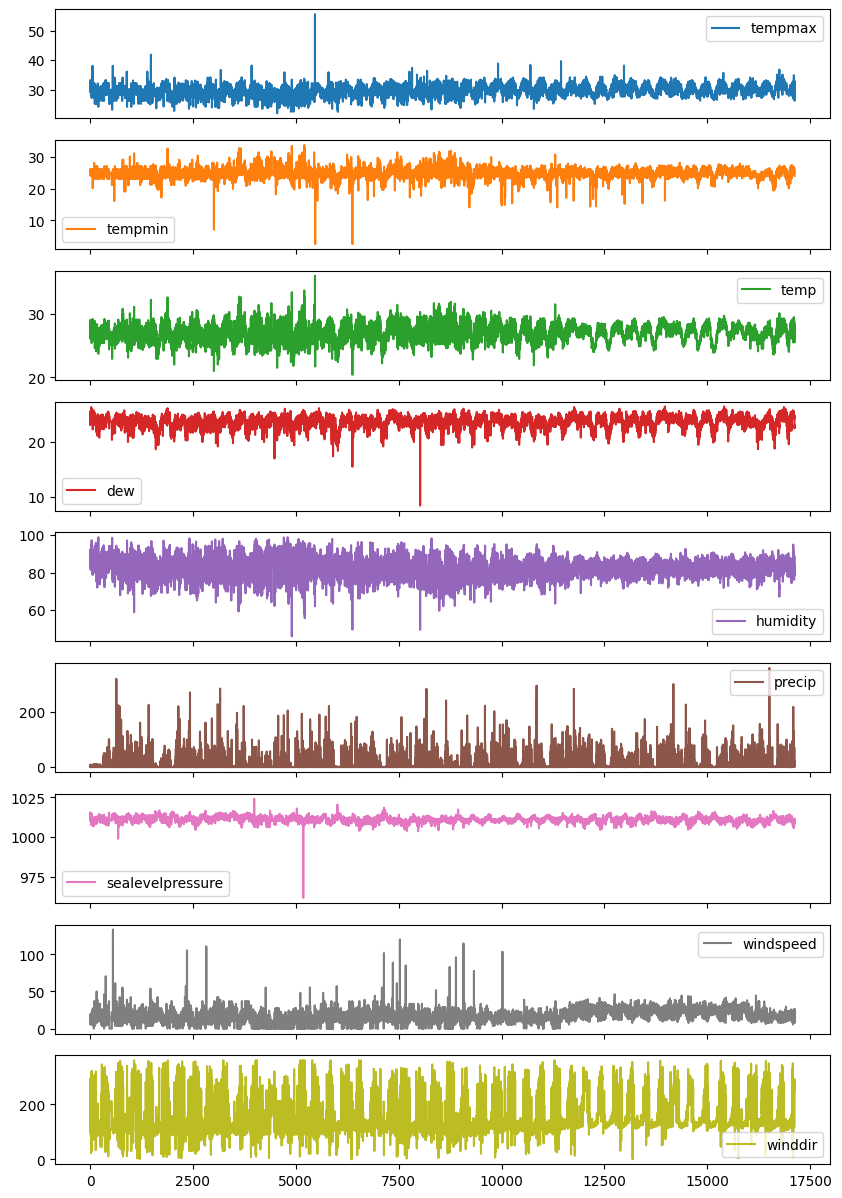

In [23]:
data3.plot(
    y=[
    'tempmax', 
    'tempmin', 
    'temp',  
    'dew', 
    'humidity', 
    'precip', 
    'sealevelpressure',
    'windspeed',
    'winddir',
    'precipprob'
    ], 
    subplots=True, figsize=(10, 15))
plt.show()

In [15]:
data3.isna().sum()

tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
precip              0
sealevelpressure    0
windspeed           0
winddir             0
precipprob          0
dtype: int64

In [21]:
data3

,tempmax,tempmin,temp,dew,humidity,precip,sealevelpressure,windspeed,winddir,precipprob
0,32.1,25.1,28.1,24.8,83.5,0.0,1011.7,18.4,183.2,False
1,31.1,25.1,27.9,24.9,84.4,0.0,1012.5,18.4,120.5,False
2,32.1,26.1,29.0,25.5,82.7,0.0,1013.0,9.4,99.7,False
3,33.1,25.1,28.5,25.1,83.2,0.0,1013.3,14.8,234.8,False
4,31.1,24.1,27.1,23.1,85.2,0.0,1013.6,5.4,148.1,False
...,...,...,...,...,...,...,...,...,...,...
17116,32.7,25.1,28.5,24.9,81.7,0.0,1011.5,11.2,249.3,False
17117,27.8,25.4,26.6,23.6,83.9,10.4,1010.7,10.8,290.6,True
17118,26.2,25.0,25.5,22.5,83.7,1.6,1010.6,7.6,274.1,True
17119,29.6,24.5,26.7,22.6,78.3,14.2,1009.7,23.8,266.0,True


In [16]:
# Membagi variabel independen dan target
X = data3[[
    'temp', 
    'tempmax',
    'tempmin',
    'humidity',
    'sealevelpressure', 
    'windspeed',
    'winddir'
    ]]  # Variabel independen
y = data3['precipprob']  # Target (Curah Hujan)

In [17]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Daftar model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluasi semua model dan menyimpan hasil dalam bentuk tabel
results = []
for name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro avg)': report['macro avg']['precision'],
        'Recall (macro avg)': report['macro avg']['recall'],
        'F1-Score (macro avg)': report['macro avg']['f1-score']
    })

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df)

                       Model  Accuracy  Precision (macro avg)  \
0        Logistic Regression  0.748029               0.746095   
1              Decision Tree  0.682044               0.676742   
2              Random Forest  0.762628               0.759466   
3          Gradient Boosting  0.754161               0.752794   
4  Support Vector Classifier  0.758540               0.759815   
5        K-Nearest Neighbors  0.724088               0.719746   

   Recall (macro avg)  F1-Score (macro avg)  
0            0.737104              0.739606  
1            0.677086              0.676904  
2            0.754963              0.756623  
3            0.743071              0.745748  
4            0.745249              0.748571  
5            0.715144              0.716675  


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>